In [1]:
## import the libraries I'll be using for the rest of the project
import numpy as np
import pandas as pd

In [2]:
movies_org = pd.read_csv('movies.csv.zip')
movies_org.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
user_ratings_org = pd.read_csv('user_ratings.csv.zip')
user_ratings_org.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# PRACTICE BEGIN

## Implicit vs. explicit data

As mentioned in the video exercise, feedback used in recommendation engines can be explicit or implicit.

The dataset listening_history_df has been loaded for you. This dataset contains columns identifying the users, the songs they listen to, along with:

    - Skipped Track: A Boolean column recording whether the user skipped the song or listened to it to the end.
    - Rating: The score out of 10 the user gave the song.

In this exercise, you will explore the data and from this exploration identify which columns best reflect explicit feedback versus implicit feedback.

### Instructions 1/2
    - Inspect the first 5 rows of listening_history_df.
    - Print the number of unique values in the Rating and Skipped Track columns.
    - Display a histogram of the values in the Rating column


```python
    # Inspect the listening_history_df DataFrame
    print(listening_history_df.head())
    
    # Calculate the number of unique values
    print(listening_history_df[['Rating', 'Skipped Track']].nunique())
    
    # Display a histogram of the values in the Rating column
    listening_history_df['Rating'].hist()
    plt.show()
```

#### Results not show (I couldn't find the datasource)

## Introduction to non-personalized recommendations

One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. In this exercise, you will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.

The DataFrame user_ratings_df, which is a subset of the Movie Lens dataset, has been loaded for you. This table contains identifiers for each movie and the user who watched it, along with the rating they gave it.

### Instructions 1/2
    - Calculate the number of times each movie occurs in the dataset.
    - Print the titles of the top five most frequently seen movies.

In [4]:
## Preparation for the actual solution
user_ratings_df = user_ratings_org[["userId", "movieId", "rating", "title"]].copy()

In [5]:
## SOLUTION
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object', name='title')


## Improved non-personalized recommendations

Just because a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. To understand how a viewer actually felt about a movie, more explicit data is useful. Thankfully, you also have ratings from each of the viewers in the Movie Lens dataset.

In this exercise, you will find the average rating of each movie in the dataset, and then find the movie with the highest average rating.

You will use the same user_ratings_df as you used in the previous exercise, which has been loaded for you.

### Instructions
    - Find the average rating for each of the movies and store it as a DataFrame called average_rating_df.
    - Sort the average_rating_df DataFrame by the average rating column from highest to lowest and store it as sorted_average_ratings.
    - Print the entries for the top five highest ranked movies in sorted_average_ratings.

In [6]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


## Combining popularity and reviews

In the past two exercises, you have used the two most common non-personalized recommendation methods to find movies to suggest. As you may have noticed, they both have their weaknesses.

Finding the most frequently watched movies will show you what has been watched, but not how people explicitly feel about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.

In this exercise, you will combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.

### Instructions 1/3
    - Generate a list of the names of the movies appearing more than 50 times in user_ratings_df and store it as popular_movies.

In [7]:
# Create a list of only the frequently watched movies
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Chasing Amy (1997)', 'Mystic River (2003)',
       'Grand Budapest Hotel, The (2014)', 'Blow (2001)',
       'Army of Darkness (1993)', 'Training Day (2001)', 'Bad Boys (1995)',
       'Splash (1984)', 'Mulholland Drive (2001)',
       'The Devil's Advocate (1997)'],
      dtype='object', name='title', length=437)


### Instructions 2/3
    - Filter the original user_ratings_df DataFrame by the popular_movies list to create a popular_movies_rankings DataFrame and print the results.

In [8]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
print(popular_movies_rankings)

       userId  movieId  rating                 title
0           1        1     4.0      Toy Story (1995)
1           5        1     4.0      Toy Story (1995)
2           7        1     4.5      Toy Story (1995)
3          15        1     2.5      Toy Story (1995)
4          17        1     4.5      Toy Story (1995)
...       ...      ...     ...                   ...
79246     603     1997     4.0  Exorcist, The (1973)
79247     606     1997     3.0  Exorcist, The (1973)
79248     607     1997     5.0  Exorcist, The (1973)
79249     608     1997     4.5  Exorcist, The (1973)
79250     610     1997     4.0  Exorcist, The (1973)

[40712 rows x 4 columns]


### Instructions 3/3
    - Find the average rating given to the frequently watched films in popular_movies_rankings and store it as popular_movies_average_rankings.
    - Print the entries in popular_movies_average_rankings that contain the highest-ranked movies.

In [9]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


## Finding all pairs of movies

In this exercise, you will work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.

The user_ratings_df has been loaded once again containing users, and the movies they have seen.

You will need to first create a function that finds all possible pairs of items in a list it is applied to. For ease of use, you will output the values of this as a DataFrame. Since you only want to find movies that have been seen by the same person and not all possible permutations, you will group by user_id when applying the function.

### Instructions 1/2
    - Create a function called find_movie_pairs that finds all permutations of a Series, and stores the results as a DataFrame.
    - Apply this function to the user_ratings_df DataFrame and print the results.

In [41]:
## Prepare the title column by removing the year
user_ratings_df['title'] = user_ratings_df['title'].str.replace(r'\(\d{4}\)', '', regex=True)

## Drop the na, and then strip/trim the title column
user_ratings_df = user_ratings_df.dropna().copy()
user_ratings_df['title'] = user_ratings_df['title'].str.strip()

user_ratings_df.head()

,index,userId,movieId,rating,title
0,0,1.0,1.0,4.0,Toy Story
1,1,5.0,1.0,4.0,Toy Story
2,2,7.0,1.0,4.5,Toy Story
3,3,15.0,1.0,2.5,Toy Story
4,4,17.0,1.0,4.5,Toy Story


In [42]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs)

print(movie_combinations)

                  movie_a                    movie_b
userId                                              
1.0    0        Toy Story           Grumpier Old Men
       1        Toy Story                       Heat
       2        Toy Story       Seven (a.k.a. Se7en)
       3        Toy Story        Usual Suspects, The
       4        Toy Story        From Dusk Till Dawn
...                   ...                        ...
610.0  1693897         31                 Gen-X Cops
       1693898         31                  Bloodmoon
       1693899         31  Sympathy for the Underdog
       1693900         31                     Hazard
       1693901         31                Blair Witch

[60793300 rows x 2 columns]


### Instructions 2/2
    - Remove the nested index that has been created during the aggregation.

In [43]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(
  find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

            movie_a                    movie_b
0         Toy Story           Grumpier Old Men
1         Toy Story                       Heat
2         Toy Story       Seven (a.k.a. Se7en)
3         Toy Story        Usual Suspects, The
4         Toy Story        From Dusk Till Dawn
...             ...                        ...
60793295         31                 Gen-X Cops
60793296         31                  Bloodmoon
60793297         31  Sympathy for the Underdog
60793298         31                     Hazard
60793299         31                Blair Witch

[60793300 rows x 2 columns]


## Counting up the pairs

You can now create DataFrame of all the permutations of movies that have been watched by the same user. This is of limited use unless you can find which movies are most commonly paired.

In this exercise, you will work with the movie_combinations DataFrame that you created in the last exercise (that has been loaded for you), and generate a new DataFrame containing the counts of occurrences of each of the pairs within.

### Instructions 1/2
    - Find the number of times each pair of movies occurs and assign it to combination_counts.

In [44]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
print(combination_counts.head())

movie_a  movie_b                            
'71      (500) Days of Summer                   1
         10 Cloverfield Lane                    1
         127 Hours                              1
         13 Assassins (Jûsan-nin no shikaku)    1
         13 Hours                               1
dtype: int64


### Instructions 2/2
    - Convert the resulting nested Series (combination_counts) to a DataFrame labeled combination_counts_df with the counted column named size.
    - Reset the index for ease of reading.

In [45]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

  movie_a                              movie_b  size
0     '71                 (500) Days of Summer     1
1     '71                  10 Cloverfield Lane     1
2     '71                            127 Hours     1
3     '71  13 Assassins (Jûsan-nin no shikaku)     1
4     '71                             13 Hours     1


## Making your first movie recommendations

Now that you have found the most commonly paired movies, you can make your first recommendations!

While you are not taking in any information about the person watching, and do not even know any details about the movie, valuable recommendations can still be made by examining what groups of movies are watched by the same people. In this exercise, you will examine the movies often watched by the same people that watched Thor, and then use this data to give a recommendation to someone who just watched the movie. The DataFrame you generated in the last lesson, combination_counts_df, that contains counts of how often movies are watched together has been loaded for you.

### Instructions
    - Order the combination_counts_df object from largest to smallest by the size column.
    - Find the newly ordered movie frequencies for the movie Thor by subsetting the ordered combination_counts_df object where movie_a is Thor assign them to thor_df and plot the results.

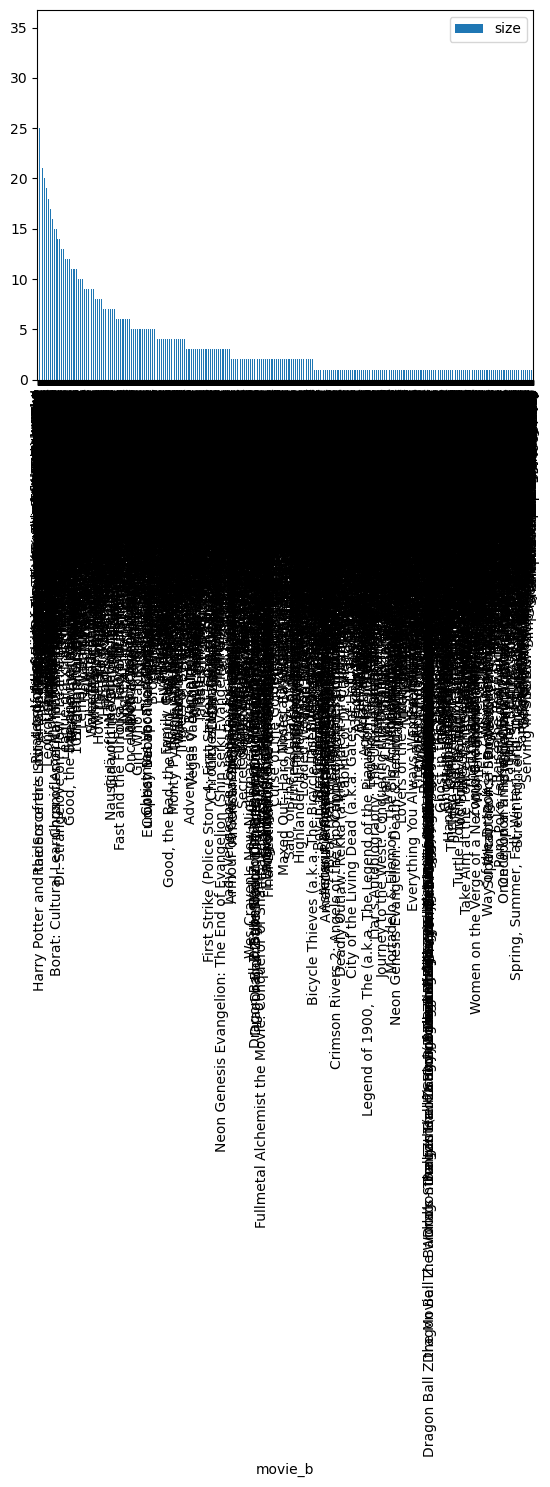

In [47]:
## They clearly filtered their list down somewhat, but I don't know how, so my bar chart ends up looking to large

import matplotlib.pyplot as plt

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the movies most frequently watched by people who watched Thor
thor_df = combination_counts_df[combination_counts_df['movie_a'] == 'Thor']

# Plot the results
thor_df.plot.bar(x="movie_b")
plt.show()

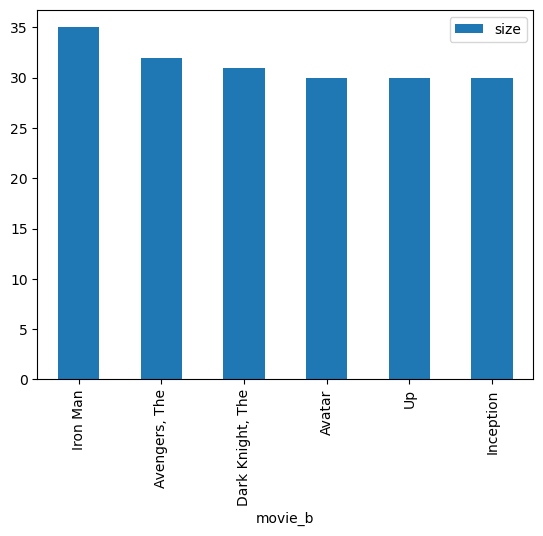

In [49]:
## Cleaned up to only show movies with a size greater than 30
thor_df = thor_df[thor_df['size'] >= 30]

# Plot the results
thor_df.plot.bar(x="movie_b")
plt.show()